In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tikzplotlib

In [2]:
directory = '../../../test-repo/export_wandb/'

In [3]:
df1 = pd.read_csv(directory + 'wandb_export_2022-03-09T11_29_14.379+01_00.csv')
df2 = pd.read_csv(directory + 'wandb_export_2022-03-09T11_29_28.097+01_00.csv')

In [4]:
i_file_1 = df1['curious-elevator-149 - i_file']
n_shots_1 = df1['curious-elevator-149 - n_shots']
ind1_1 = df1['curious-elevator-149 - ind1']
ind2_1 = df1['curious-elevator-149 - ind2']
i_file_2 = df2['zesty-brook-148 - i_file']
n_shots_2 = df2['zesty-brook-148 - n_shots']
ind1_2 = df2['zesty-brook-148 - ind1']
ind2_2 = df2['zesty-brook-148 - ind2']

## 1-shot

In [5]:
nb_novel_class = 20
one_shot = np.zeros((64,nb_novel_class,nb_novel_class))
one_shot_conf = np.zeros((64,nb_novel_class,nb_novel_class))
for i in range(64):
    if i>20:
        i_file= i_file_1
        n_shots= n_shots_1
        ind1 = ind1_1
        ind2 = ind2_1
        df = df1
        name ='curious-elevator-149'
    else:
        i_file= i_file_2
        n_shots= n_shots_2
        ind1 = ind1_2
        ind2 = ind2_2
        df = df2
        name = 'zesty-brook-148'
        
    idx1 = i_file==i
    idx2 = n_shots ==1
    for k in range(nb_novel_class):
        for l in range(nb_novel_class):
            idx3 = ind1 == k
            idx4 = ind2 == l
            idx  = idx1 * idx2 * idx3 * idx4 
            #print(idx.sum(), idx1.sum(), idx2.sum(), idx3.sum() , idx4.sum())
            one_shot[i,k,l] = df[name + ' - test_acc'][idx]
            one_shot_conf[i,k,l] = df[name + ' - test_conf'][idx]

In [6]:
f_shot = np.zeros((64,nb_novel_class,nb_novel_class))
f_shot_conf = np.zeros((64,nb_novel_class,nb_novel_class))
for i in range(64):
    if i>20:
        i_file= i_file_1
        n_shots= n_shots_1
        ind1 = ind1_1
        ind2 = ind2_1
        df = df1
        name ='curious-elevator-149'
    else:
        i_file= i_file_2
        n_shots= n_shots_2
        ind1 = ind1_2
        ind2 = ind2_2
        df = df2
        name = 'zesty-brook-148'
        
    idx1 = i_file==i
    idx2 = n_shots ==1
    for k in range(nb_novel_class):
        for l in range(nb_novel_class):
            idx3 = ind1 == k
            idx4 = ind2 == l
            idx  = idx1 * idx2 * idx3 * idx4 
            #print(idx.sum(), idx1.sum(), idx2.sum(), idx3.sum() , idx4.sum())
            f_shot[i,k,l] = df[name+' - test_acc'][idx]
            f_shot_conf[i,k,l] = df[name+' - test_conf'][idx]

In [7]:
df_baseline = pd.read_csv(directory + 'wandb_export_2022-03-09T14_22_29.230+01_00.csv')

In [8]:
n_shots = df_baseline['snowy-paper-147 - n_shots']
ind1 = df_baseline['snowy-paper-147 - ind1']
ind2 = df_baseline['snowy-paper-147 - ind2']

In [9]:
nb_novel_class = 20
baseline_1=np.zeros((nb_novel_class,nb_novel_class))
baseline_1conf=np.zeros((nb_novel_class,nb_novel_class))
idx2 = n_shots == 1 
for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        idx3 = ind1 == k
        idx4 = ind2 == l
        idx  =  idx2 * idx3 * idx4
        #print(idx.sum(), idx2.sum(), idx3.sum() , idx4.sum(),k,l)
        baseline_1[k,l] = df_baseline['snowy-paper-147 - test_acc'][idx]
        baseline_1conf[k,l] = df_baseline['snowy-paper-147 - test_conf'][idx]

In [10]:
baseline_5=np.zeros((nb_novel_class,nb_novel_class))
baseline_5conf=np.zeros((nb_novel_class,nb_novel_class))
idx2 = n_shots == 5
for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        idx3 = ind1 == k
        idx4 = ind2 == l
        idx  =  idx2 * idx3 * idx4
        #print(idx.sum(), idx2.sum(), idx3.sum() , idx4.sum(),k,l)
        baseline_5[k,l] = df_baseline['snowy-paper-147 - test_acc'][idx]
        baseline_5conf[k,l] = df_baseline['snowy-paper-147 - test_conf'][idx]

In [11]:
conf_1  = np.sqrt(one_shot_conf**2 + baseline_1conf**2)
conf_5  = np.sqrt(f_shot_conf**2 + baseline_5conf**2)

In [12]:
boost = one_shot - baseline_1
boost5 = f_shot - baseline_5
bestc_boost = np.argmax(boost,0)
worstc_boost = np.argmin(boost,0)
bestc_boost5 = np.argmax(boost5,0)
worstc_boost5 = np.argmin(boost5,0)
best_boost = np.max(boost,0)
worst_boost = np.min(boost,0)
best_boost5 = np.max(boost5,0)
worst_boost5 = np.min(boost5,0)

In [13]:
np.save('../data/boost.npy', boost)

Text(0.5, 1.0, 'best base class boost')

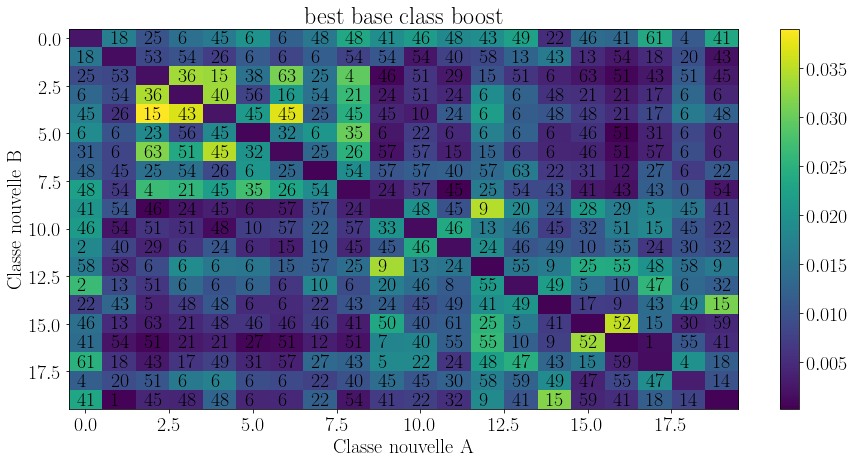

In [14]:
plt.figure(figsize=(15,7))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
    'font.size'   : 20
})
plt.imshow(best_boost,aspect='auto')
shift_x, shift_y = -0.25, 0.25

for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        if l!= k:
            plt.text(k+shift_x,l+shift_y,str(bestc_boost[k,l]))
plt.colorbar()
plt.xlabel('Classe nouvelle A')
plt.ylabel('Classe nouvelle B')
plt.savefig('../figures/best_boost.pdf')
#tikzplotlib.save("Best.tikz")

plt.title('best base class boost')

Text(0.5, 1.0, 'worst base class boost')

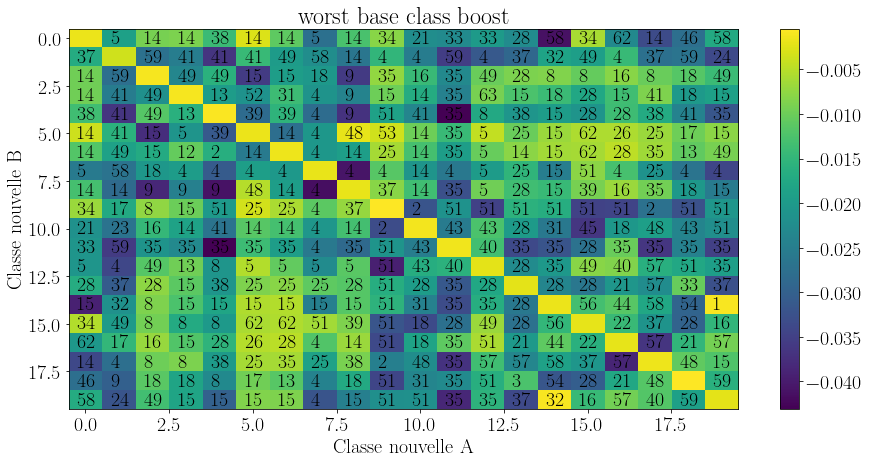

In [15]:
plt.figure(figsize=(15,7))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
    'font.size'   : 20
})
plt.imshow(worst_boost,aspect='auto')
shift_x, shift_y = -0.25, 0.25

for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        if l!= k:
            plt.text(k+shift_x,l+shift_y,str(worstc_boost[k,l]))
plt.colorbar()
plt.xlabel('Classe nouvelle A')
plt.ylabel('Classe nouvelle B')
plt.savefig('../figures/worst_boost.pdf')


plt.title('worst base class boost')

Text(0.5, 1.0, '5050boost')

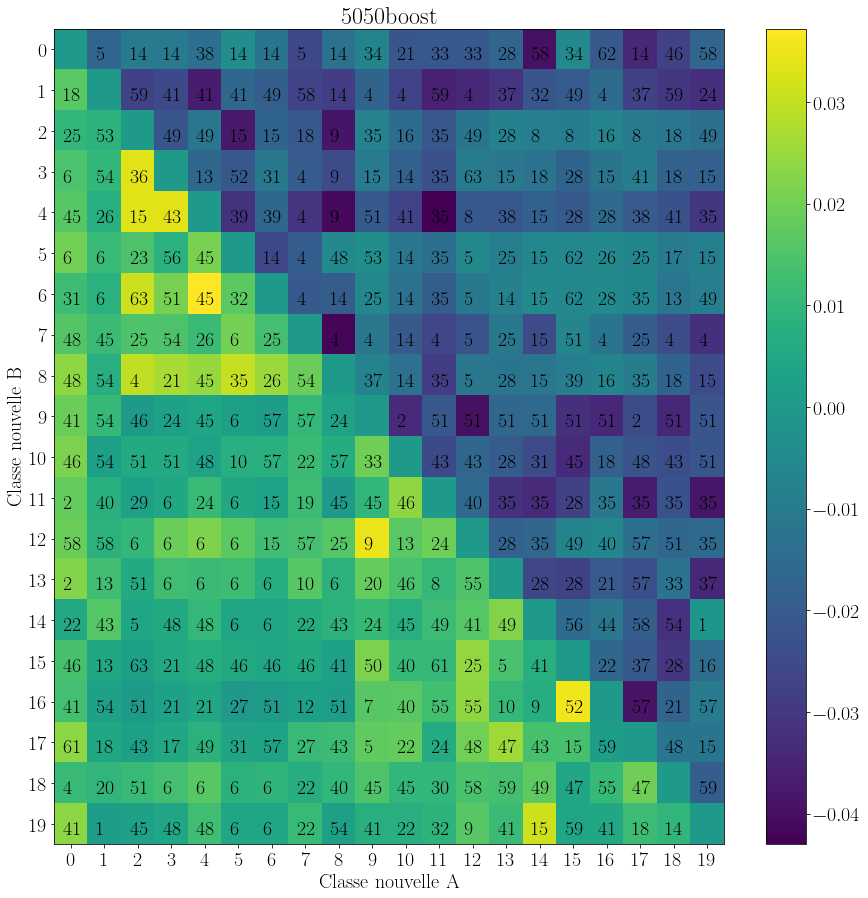

In [16]:
boost5050 = np.zeros((nb_novel_class,nb_novel_class))
for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        if k<l:
            boost5050[k,l] = best_boost[k,l]
        elif k>l:
            boost5050[k,l] = worst_boost[k,l] 

plt.figure(figsize=(15,15))
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica",
    'font.size'   : 20
})
#boost5050[1,10]= 20
plt.imshow(boost5050.T,aspect='auto')
shift_x, shift_y = -0.25, 0.25

for k in range(nb_novel_class):
    for l in range(nb_novel_class):
        if k<l:
            plt.text(k+shift_x,l+shift_y,str(bestc_boost[k,l]))
        elif k>l:
            plt.text(k+shift_x,l+shift_y,str(worstc_boost[k,l]))
        else:
            pass
        
       
#plt.text(1,10,'hello')
plt.colorbar()
plt.xticks(np.arange(0, nb_novel_class, 1))
plt.yticks(np.arange(0, nb_novel_class, 1))

plt.xlabel('Classe nouvelle A')
plt.ylabel('Classe nouvelle B')
plt.savefig('../figures/boost5050.pdf')
#tikzplotlib.save("Best.tikz")

plt.title('5050boost')

In [17]:
np.save('../data/boost5050.npy', boost5050)
np.save('../data/bestc_boost.npy', bestc_boost)
np.save('../data/worstc_boost.npy', worstc_boost)

Text(0.5, 1.0, '1 shot')

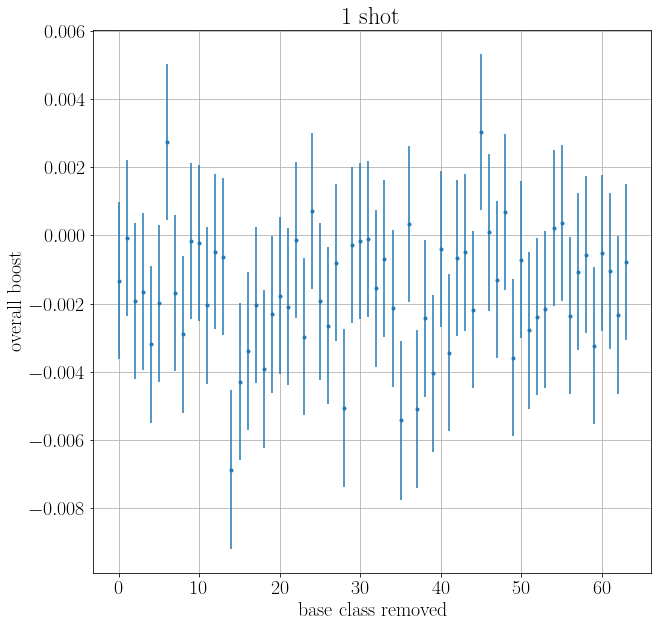

In [18]:
plt.figure(figsize = (10,10))
plt.errorbar(x= np.arange(64),y = boost.mean(1).mean(1), yerr =conf_1.mean(1).mean(1), fmt ='.')
plt.xlabel('base class removed')
plt.ylabel('overall boost')
plt.grid()
plt.title('1 shot')

Text(0.5, 1.0, '5 shot')

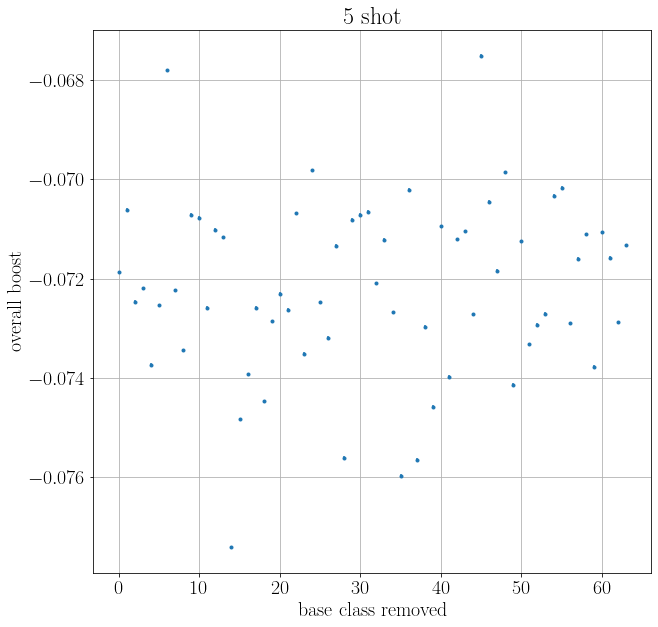

In [19]:
plt.figure(figsize = (10,10))
plt.errorbar(x= np.arange(64),y = boost5.mean(1).mean(1), yerr =conf_5.mean(1).mean(1)/64, fmt ='.')
plt.xlabel('base class removed')
plt.ylabel('overall boost')
plt.grid()
plt.title('5 shot')

# No Forced class

In [20]:
df = pd.read_csv(directory + 'wandb_export_2022-03-10T16_45_18.210+01_00.csv')

In [21]:
name = 'fallen-snow-151'
baseline_1 , baseline_5 = df[name+' - test_acc1'][0],df[name+' - test_acc5'][1]
baseline_1_conf , baseline_5_conf = df[name+' - test_conf1'][0],df[name+' - test_conf5'][1]

In [22]:
df = pd.read_csv(directory + 'wandb_export_2022-03-11T11_12_18.303+01_00.csv')

In [23]:
name= 'morning-field-155'
score_1,score_5 = df[name+' - test_acc1'][::2],df[name+' - test_acc5'][1::2]
conf_1 ,conf_5 = df[name+' - test_conf1'][0::2],df[name+' - test_conf5'][1::2]
i_file = df[name+' - i_file']
confidence_1 , confidence_5 = np.sqrt(conf_1**2 + baseline_1_conf**2 ) , np.sqrt(conf_5**2 + baseline_5_conf**2 ) 

In [24]:
boost_1,boost_5 = score_1-baseline_1 , score_5-baseline_5

Text(0.5, 1.0, '1-shot')

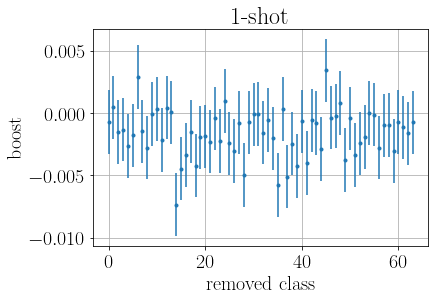

In [25]:
plt.figure()
plt.errorbar(x= np.arange(64), y = boost_1,yerr = confidence_1, fmt ='.' )
plt.xlabel('removed class')
plt.ylabel('boost')
plt.grid()
plt.title('1-shot')

In [26]:
sortedclass = np.argsort(np.array(boost_1))
print('best classes to remove' , sortedclass[-5:][::-1], 'worst classes to remove' , sortedclass[:5])

best classes to remove [45  6 24 48  1] worst classes to remove [14 35 37 28 15]


Text(0.5, 1.0, '5-shot')

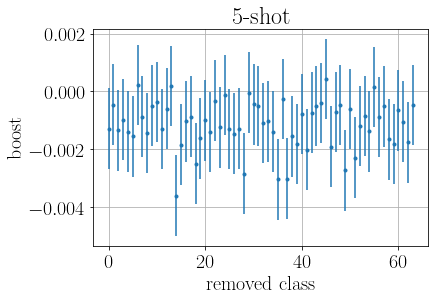

In [27]:
plt.figure()
plt.errorbar(x= np.arange(64), y = boost_5,yerr = confidence_5, fmt ='.' )
plt.xlabel('removed class')
plt.ylabel('boost')
plt.grid()
plt.title('5-shot')

## 10 000 runs

In [28]:
df = pd.read_csv(directory + 'wandb_export_2022-03-12T14_44_38.842+01_00.csv')

In [29]:
name = 'pleasant-microwave-159'
baseline_1 , baseline_5 = df[name+' - test_acc1'][0],df[name+' - test_acc5'][1]
baseline_1_conf , baseline_5_conf = df[name+' - test_conf1'][0],df[name+' - test_conf5'][1]

In [30]:
df = pd.read_csv(directory + 'wandb_export_2022-03-12T14_41_07.931+01_00.csv')

In [31]:
name= 'ancient-jazz-158'
score_1,score_5 = df[name+' - test_acc1'][::2],df[name+' - test_acc5'][1::2]
conf_1 ,conf_5 = df[name+' - test_conf1'][0::2],df[name+' - test_conf5'][1::2]
i_file = df[name+' - i_file']
confidence_1 , confidence_5 = np.sqrt(conf_1**2 + baseline_1_conf**2 ) , np.sqrt(conf_5**2 + baseline_5_conf**2 ) 

In [32]:
boost_1,boost_5 = score_1-baseline_1 , score_5-baseline_5

Text(0.5, 1.0, '1-shot')

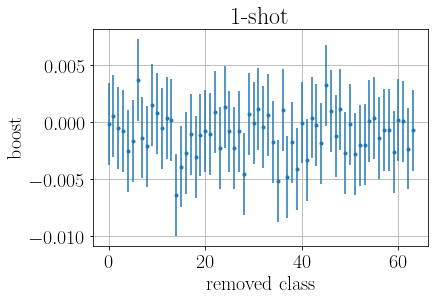

In [33]:
plt.figure()
plt.errorbar(x= np.arange(64), y = boost_1,yerr = confidence_1, fmt ='.' )
plt.xlabel('removed class')
plt.ylabel('boost')
plt.grid()
tikzplotlib.save('../figures/all_novel.tikz')
plt.title('1-shot')

Text(0.5, 1.0, '5-shot')

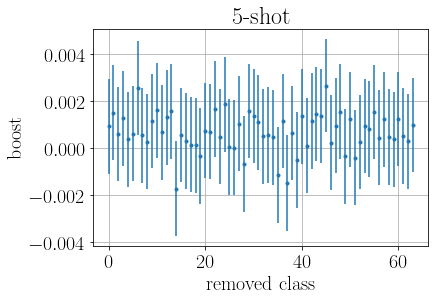

In [34]:
plt.figure()
plt.errorbar(x= np.arange(64), y = boost_5,yerr = confidence_5, fmt ='.' )
plt.xlabel('removed class')
plt.ylabel('boost')
plt.grid()
plt.title('5-shot')